In [1]:
import torch
import torch.nn.functional as F
import kornia.color as K
import numpy as np

from hdr_mask import get_diff_mask
from torch.utils.data import DataLoader
import sys
import os
# 添加SAFNet根目录到Python路径
root_dir = '/root/code/hdr/SAFNet'
if root_dir not in sys.path:
    sys.path.append(root_dir)

# 然后再导入HDRDataset
from dataset.datasets import HDRDataset
def get_test_image(index=0):
    val_dir = '/root/code/hdr/kata17'
    val_dataset = HDRDataset(val_dir,is_train=False)  
    val_loader = DataLoader(val_dataset, batch_size=1)
    
    # Get specific index from validation loader
    for i, (imgs_lin, imgs_ldr, expos, img_hdr_gt) in enumerate(val_loader):
        if i == index:
            # Take specific LDR images from batch
            source = imgs_ldr[0]  # First LDR image
            reference = imgs_ldr[2]  # Third LDR image
            return source, reference
            
    raise IndexError(f"Index {index} is out of range for the dataset")


/root/miniconda3/envs/torch113/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
source, reference = get_test_image(index=3)

15


torch.Size([1, 3, 1000, 1500])


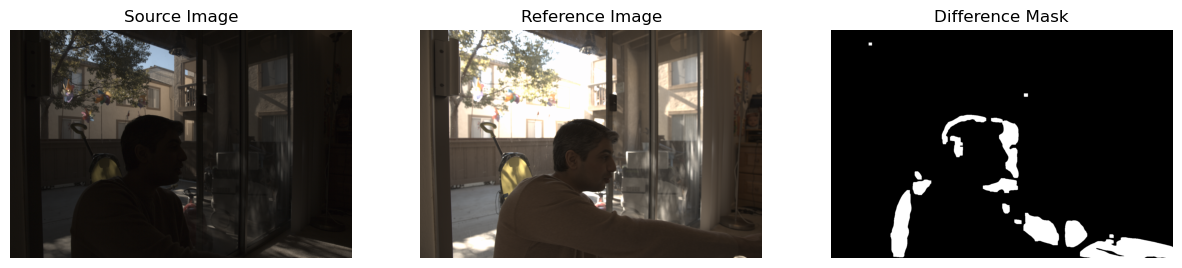

Mask ratio: 6.94%


In [14]:
import numpy as np
from PIL import Image



print(source.shape)
diff_mask = get_diff_mask(source, reference,kernel_size=17,
                          threshold=0.93,eroded_kernel_size=11,
                          dilated_kernel_size=13,percentile=0.03)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(source[0].permute(1,2,0).cpu().numpy())
plt.title('Source Image')
plt.axis('off')

plt.subplot(132) 
plt.imshow(reference[0].permute(1,2,0).cpu().numpy())
plt.title('Reference Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(diff_mask[0,0].cpu().numpy(), cmap='gray')
plt.title('Difference Mask')
plt.axis('off')

plt.show()

# Calculate mask ratio (percentage of white pixels)
mask_ratio = diff_mask.mean().item()
print(f"Mask ratio: {mask_ratio:.2%}")
 
 


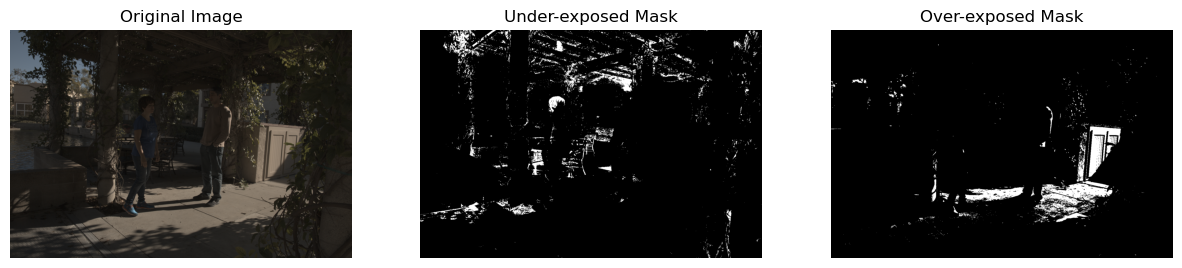

Under-exposed ratio: 4.00%
Over-exposed ratio: 4.00%


In [8]:
from hdr_mask import detect_exposure_regions

under_exposed, over_exposed = detect_exposure_regions(source,percentile=0.04)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(source[0].permute(1,2,0).cpu().numpy())
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(under_exposed[0].cpu().numpy(), cmap='gray')
plt.title('Under-exposed Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(over_exposed[0].cpu().numpy(), cmap='gray')
plt.title('Over-exposed Mask')
plt.axis('off')

plt.show()

# Calculate mask ratios
under_ratio = under_exposed.mean().item()
over_ratio = over_exposed.mean().item()
print(f"Under-exposed ratio: {under_ratio:.2%}")
print(f"Over-exposed ratio: {over_ratio:.2%}")
